In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
import timesynth as ts

#### Harmonic Signals

In [29]:
#Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)
#Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)

In [30]:
#Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(frequency=0.25)

In [31]:
#Initializing Gaussian noise
white_noise = ts.noise.GaussianNoise(std=0.3)

In [32]:
#Initializing TimeSeries class with the signal and noise objects
timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)

In [33]:
#Sampling using the irregular time samples
samples, signals, errors = timeseries.sample(irregular_time_samples)

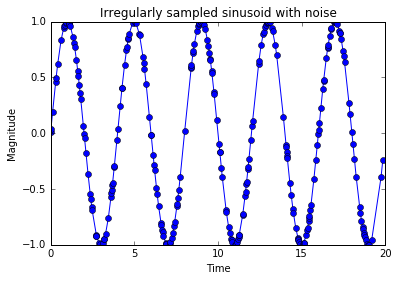

In [34]:
#Plotting the series
plt.plot(irregular_time_samples, samples, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with noise')

#### Harmonic Signals with Red noise

In [35]:
#Initializing Gaussian noise
red_noise = ts.noise.RedNoise(std=0.5, tau=0.8)

In [36]:
#Initializing TimeSeries class with the signal and noise objects
timeseries_corr = ts.TimeSeries(sinusoid, noise_generator=red_noise)

In [37]:
#Sampling using the irregular time samples
samples_corr, signals_corr, errors_corr = timeseries_corr.sample(irregular_time_samples)

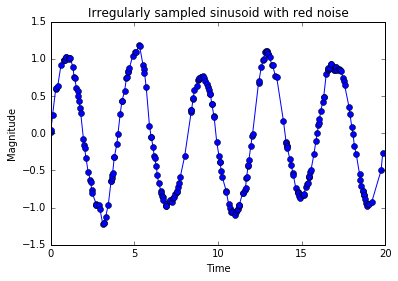

In [38]:
#Plotting the series
plt.plot(irregular_time_samples, samples_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with red noise')

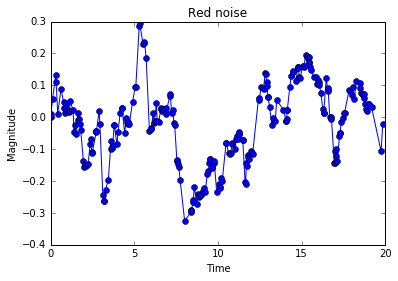

In [39]:
plt.plot(irregular_time_samples, errors_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Red noise')

#### PseudoPeriodic Signals

In [40]:
#Initializing TimeSampler
time_sampler_pp = ts.TimeSampler(stop_time=20)
#Sampling irregular time samples
irregular_time_samples_pp = time_sampler_pp.sample_irregular_time(resolution=0.05, keep_percentage=50)

In [41]:
#Initializing Pseudoperiodic signal
pseudo_periodic = ts.signals.PseudoPeriodic(frequency=2, freqSD=0.01, ampSD=0.5)

In [42]:
#Initializing TimeSeries class with the pseudoperiodic signal
timeseries_pp = ts.TimeSeries(pseudo_periodic)

In [43]:
#Sampling using the irregular time samples
samples_pp, signals_pp, errors_pp = timeseries_pp.sample(irregular_time_samples_pp)

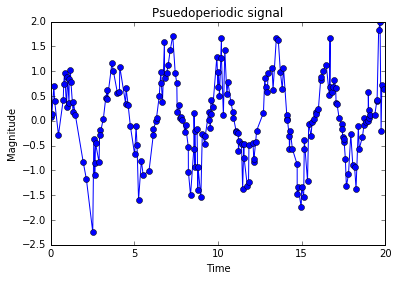

In [44]:
#Plotting the series
plt.plot(irregular_time_samples_pp, samples_pp, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Psuedoperiodic signal')

#### Gaussian Process signals

In [66]:
gp = ts.signals.GaussianProcess(kernel='Matern', alpha=5./2)
gp_series = ts.TimeSeries(signal_generator=gp)
samples = gp_series.sample(irregular_time_samples)[0]

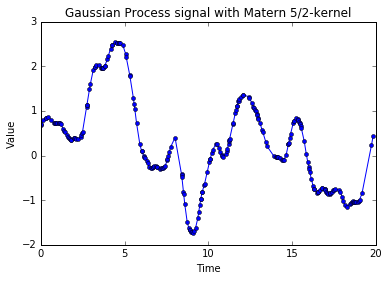

In [72]:
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gaussian Process signal with Matern 5/2-kernel');